In [1]:
import scipy.integrate as integr            
import numpy as np                          
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

colors = ["#00FFFF",                # Azure
          "#0000FF",                # Blue
          "#FF0000",                # Red
          "#00FF00",                # Green
          "#D2691E",                #
          "#AAA662",
          "#9A0EEA",
          "#808000",
          "#FFA500",
          "#9ACD32",
          "#ED0DD9",
          "#FC5A50",
          "#929591",
          "#029386",
          "#C79FEF",
          "#FAC205",
          "#6E750E",
          "#06C2AC",
          "#CD5C5C",                # IndianRed
          "#A52A2A",                # Brown
          "#7B68EE",                # MediumState_blue
          "#4682B4",                # SteelBlue
          "#800000"                # Maroon
          ]
colors = 10*colors

def mesh(x, y):
    general = []
    for i in range(len(x)):
        for j in range(len(y)):
            local = []
            local.append(x[i])
            local.append(y[j])
            general.append(local)
    return general

stat_dpi = 90
rect_pics = (7, 7)
dynamics_pics = (14, 7)

In [6]:
def f(y, t, r = 0.015, q = 1.4):
    n, k = y
    dn = r * n * (1-n/k)
    dk = q * n / (n*(q-1) + 1) - n
    return [dn, dk]



In [3]:
def plotTS(y1, y2, time):
    fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)
    plt.plot(time, y1, c = "b", label = "y1")
    plt.plot(time, y2, c = "r", label = "y2")
    plt.xlabel("time")
    plt.ylabel("y1, y2")  
    plt.title("Численное решение компонент системы")
    plt.legend()
    plt.grid(True)
    plt.show() 
    
    
def plotTSAnal(y1, y2, time, vlines1 = [], hlines1 = [], vlines2 = [], hlines2 = []):
    fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)
    plt.plot(time, y1, c = "b", label = "y1")
    plt.plot(time, y2, c = "r", label = "y2")
    plt.vlines(vlines1, 0, 7, colors = "g")
    plt.hlines(hlines1, 0, time[-1], colors = "g")
    plt.vlines(vlines2, 0, 7, colors = "y")
    plt.hlines(hlines2, 0, time[-1], colors = "y")
    plt.xlabel("time")
    plt.ylabel("y1, y2")  
    plt.title("Численное решение компонент системы")
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plotDelta(hlines, title = ""):
    fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)
    delta = hlines[1:]-hlines[:-1]
    print(f"Origin: {hlines}")
    print(f"Delta results: {delta}")
    plt.plot(delta, c = "b")
    plt.title(title)
    plt.grid(True)
    plt.show()
    
def plotFP(y1, y2, centers = None, starts = None, color = "b"):
    fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
    plt.plot(y1, y2, c = color)
    if centers is not None:
        for i in centers:
            plt.scatter(i[0], i[1])
    if starts is not None:
        for i in starts:
            plt.scatter(i[0], i[1])
    plt.xlabel("y1")
    plt.ylabel("y2")  
    plt.title("Фазовый портрет системы")
    plt.legend()
    plt.grid(True)
    plt.show() 
    
    

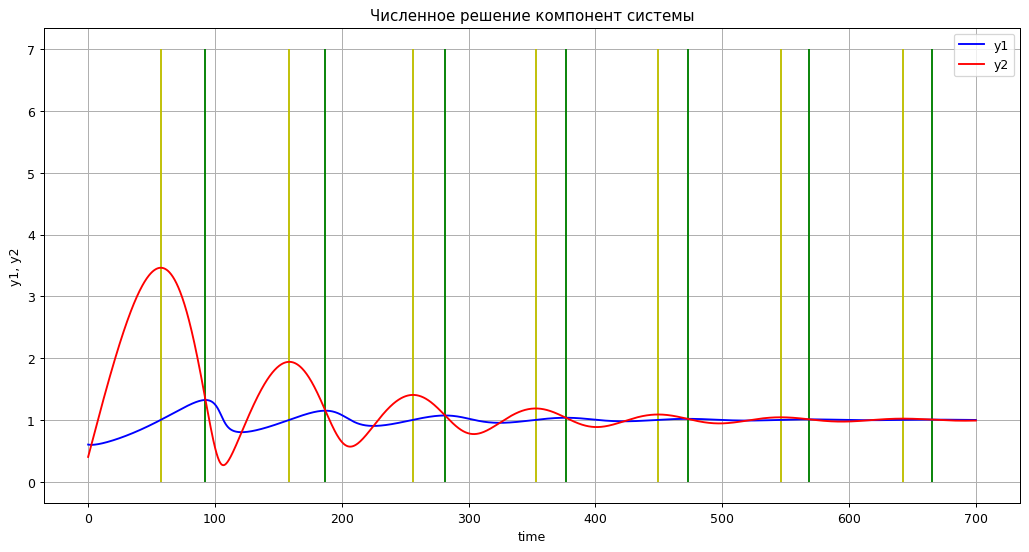

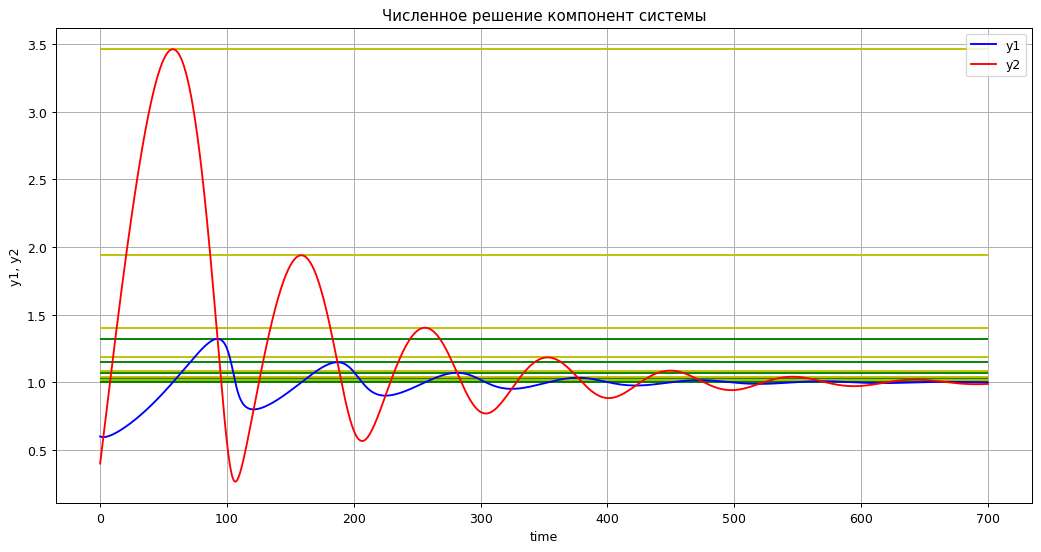

No handles with labels found to put in legend.


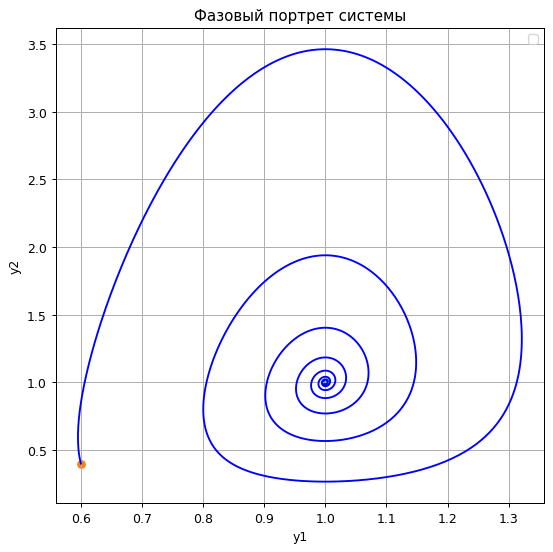

Origin: [ 92.44622311 186.99349675 281.54077039 376.7883942  472.73636818
 568.68434217 665.33266633]
Delta results: [94.54727364 94.54727364 95.24762381 95.94797399 95.94797399 96.64832416]


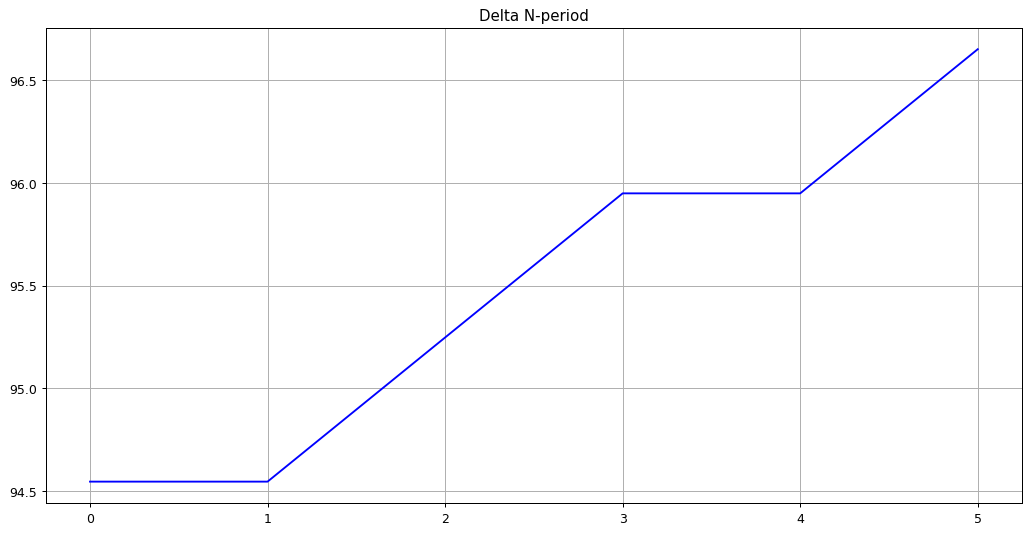

Origin: [ 57.42871436 158.62931466 256.32816408 352.97648824 449.62481241
 546.27313657 642.57128564]
Delta results: [101.2006003   97.69884942  96.64832416  96.64832416  96.64832416
  96.29814907]


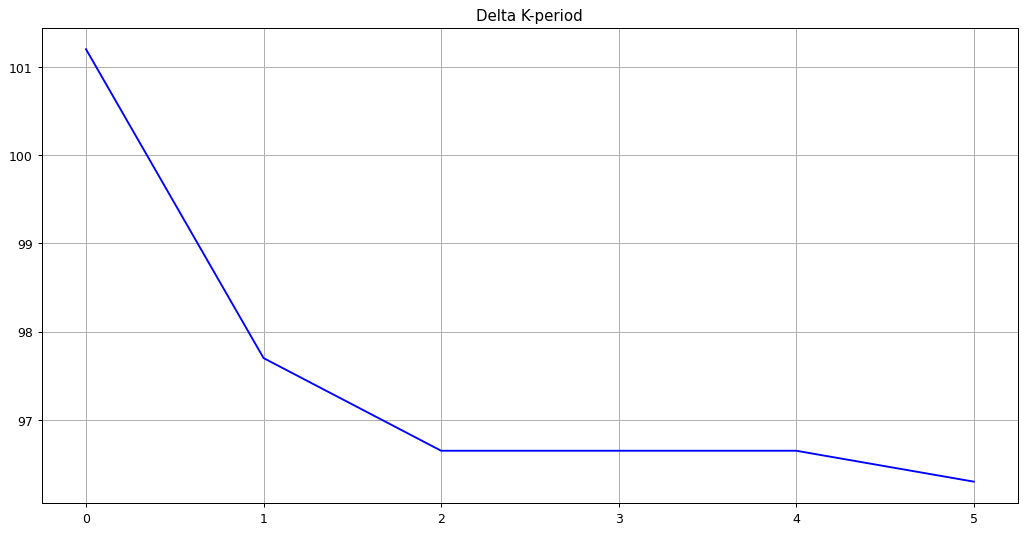

Origin: [1.3214696  1.14863089 1.07070552 1.0339856  1.01640575 1.0079352
 1.00384166]
Delta results: [-0.17283871 -0.07792537 -0.03671992 -0.01757985 -0.00847054 -0.00409354]


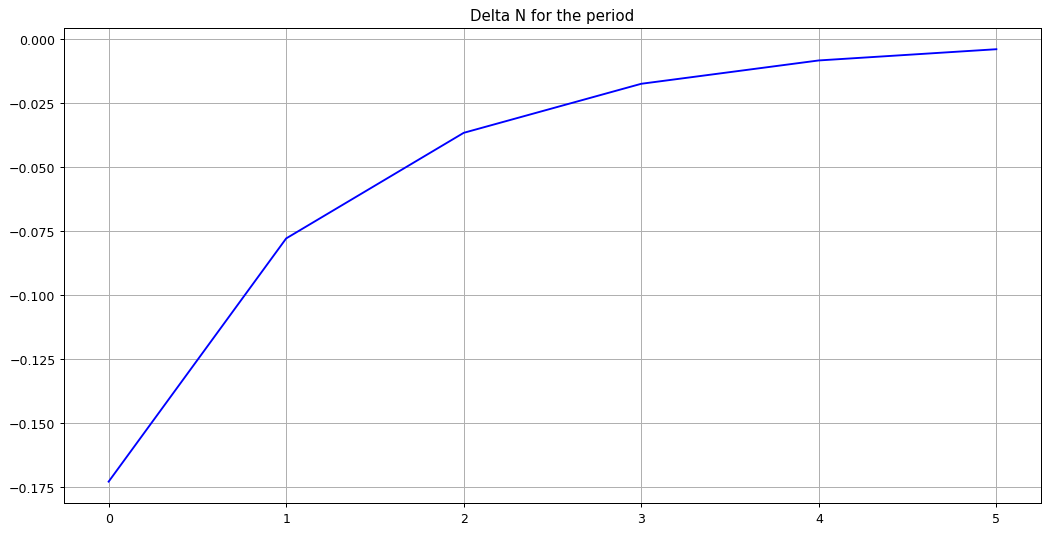

Origin: [3.46226479 1.93932959 1.40382909 1.1843976  1.08677732 1.04145032
 1.01994534]
Delta results: [-1.5229352  -0.5355005  -0.21943149 -0.09762028 -0.045327   -0.02150498]


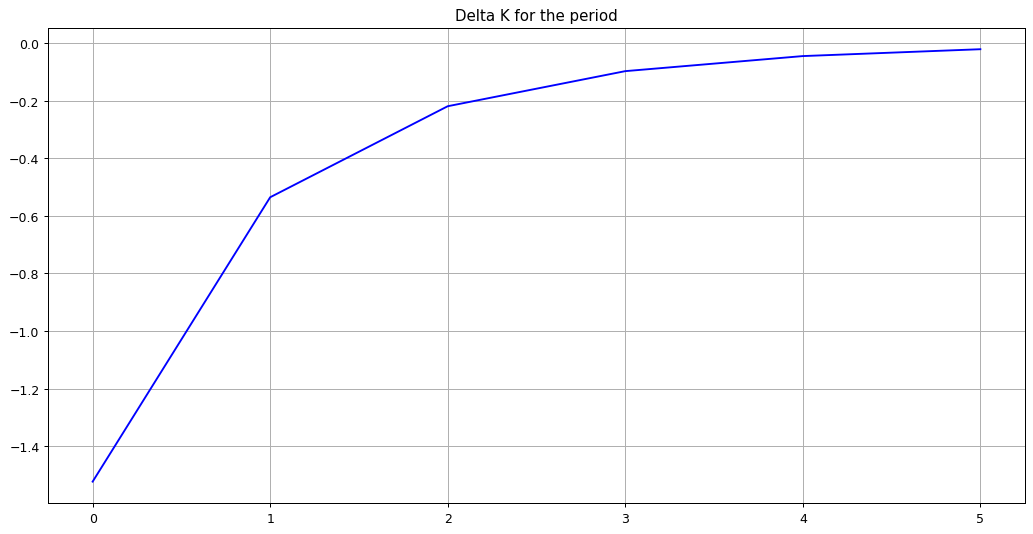

Origin: [35.01750875 28.36418209 25.2126063  23.81190595 23.11155578 22.4112056
 22.76138069]
Delta results: [-6.65332666 -3.15157579 -1.40070035 -0.70035018 -0.70035018  0.35017509]


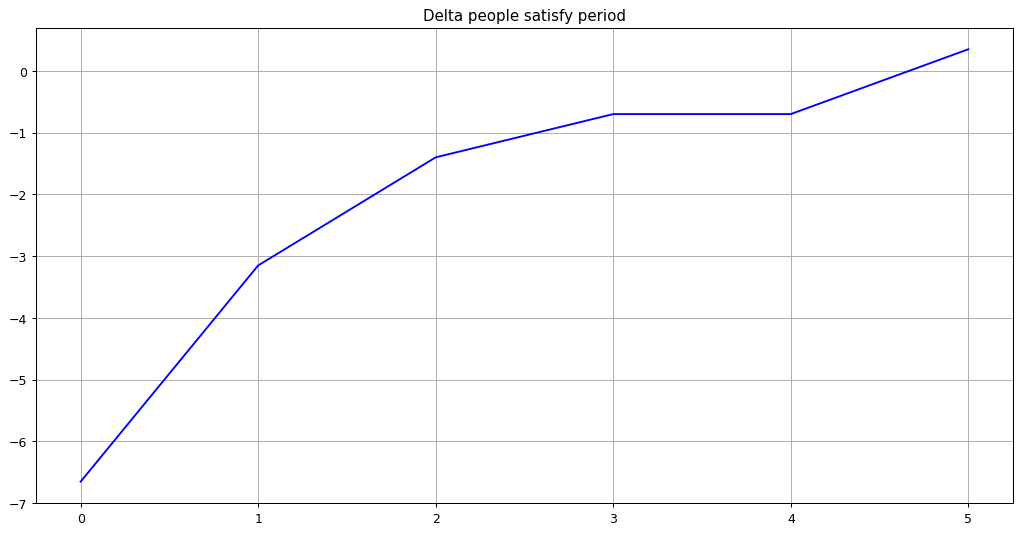

In [4]:
time = np.linspace(0, 700, 2000)
y0 = [0.6, 0.4]

w = integr.odeint(f,                   
                  y0,           
                  time,         
                  (0.015, 1.4)         
                  )
y1 = w[:, 0]      
y2 = w[:, 1] 

lmax_y1 =  argrelextrema(y1, np.greater)
lmax_y2 =  argrelextrema(y2, np.greater)


#plotTSAnal(y1, y2, time, time[lmax_y1], y1[lmax_y1], time[lmax_y2], y2[lmax_y2])
plotTSAnal(y1, y2, time, vlines1 = time[lmax_y1], vlines2 = time[lmax_y2])
plotTSAnal(y1, y2, time,  hlines1 = y1[lmax_y1],  hlines2 = y2[lmax_y2])
#plotTSAnal(y1, y2, time, vlines1 = time[lmax_y1], hlines1 = y1[lmax_y1], vlines2 = time[lmax_y2], hlines2 = y2[lmax_y2])
plotFP(y1, y2, starts = [y0], centers = [[1, 1]])
plotDelta(time[lmax_y1], title = "Delta N-period")
plotDelta(time[lmax_y2], title = "Delta K-period")
plotDelta(y1[lmax_y1], title = "Delta N for the period")
plotDelta(y2[lmax_y2], title = "Delta K for the period")
plotDelta(time[lmax_y1][:len(time[lmax_y2])] - time[lmax_y2][:len(time[lmax_y1])], title = "Delta people satisfy period")